# k-means y hierarchical clustering

In [77]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering  
from sklearn import metrics  
from scipy.cluster. hierarchy import dendrogram, linkage  
from sklearn.metrics import silhouette_score  
from scipy.cluster. hierarchy import cophenet  
from scipy.spatial.distance import pdist  
import warnings  
import matplotlib.pyplot as plt
warnings . filterwarnings('ignore')  

In [78]:
data = pd.read_csv('Mall_Customers.csv')


In [79]:
(data.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [80]:
data.shape

(200, 5)

In [81]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [82]:
data = dataset.drop(['Spending Score (1-100)'], axis=1)
data.describe()

,CustomerID,Age,Annual Income (k$)
count,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000
std,57.879185,13.969007,26.264721
min,1.000000,18.000000,15.000000
25%,50.750000,28.750000,41.500000
50%,100.500000,36.000000,61.500000
75%,150.250000,49.000000,78.000000
max,200.000000,70.000000,137.000000


In [83]:
data.dropna()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17
...,...,...,...,...
195,196,Female,35,120
196,197,Female,45,126
197,198,Male,32,126
198,199,Male,32,137


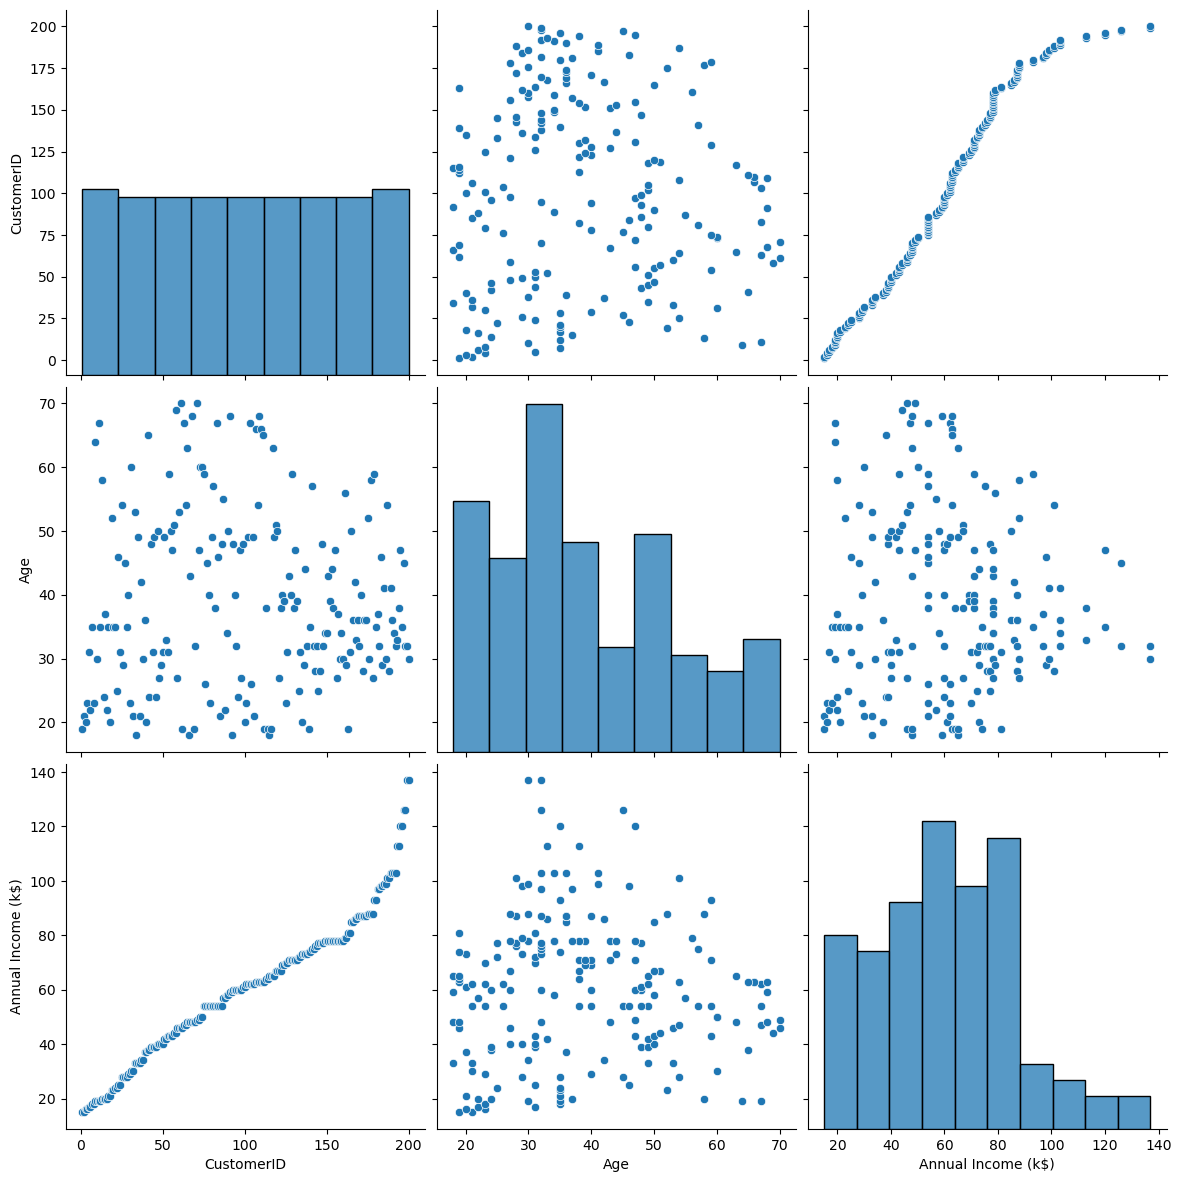

In [84]:
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [85]:
#matriz de correlacion 
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$)
CustomerID,1.000000,-0.026763,0.977548
Age,-0.026763,1.000000,-0.012398
Annual Income (k$),0.977548,-0.012398,1.000000


<Axes: >

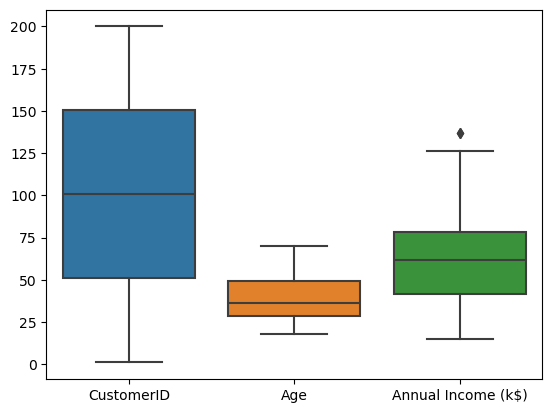

In [86]:
#Diagramas de caja 
sns.boxplot ( data=data )


In [87]:
data = pd.get_dummies(data)


In [88]:
#Estandarizar los datos antes de aplicar k-means 
scaler = StandardScaler()

In [89]:
x = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [90]:
x

,CustomerID,Age,Annual Income (k$),Gender_Female,Gender_Male
0,-1.723412,-1.424569,-1.738999,-1.128152,1.128152
1,-1.706091,-1.281035,-1.738999,-1.128152,1.128152
2,-1.688771,-1.352802,-1.700830,0.886405,-0.886405
3,-1.671450,-1.137502,-1.700830,0.886405,-0.886405
4,-1.654129,-0.563369,-1.662660,0.886405,-0.886405
...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,0.886405,-0.886405
196,1.671450,0.441365,2.497807,0.886405,-0.886405
197,1.688771,-0.491602,2.497807,-1.128152,1.128152
198,1.706091,-0.491602,2.917671,-1.128152,1.128152


# K-Means 

In [91]:
X = data.values

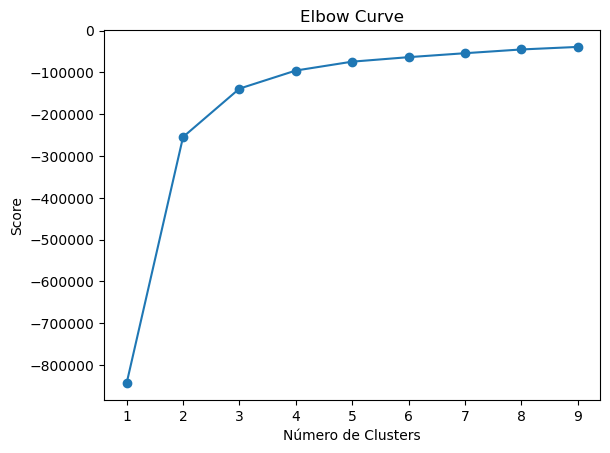

In [93]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]  # Crear una lista de objetos KMeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]  # Calcular el score para cada número de clusters
plt.plot(Nc, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [95]:
kmeans = KMeans (n_clusters=3).fit (X)  
centroids = kmeans.cluster_centers_  
centroids

array([[ 31.01639344,  36.91803279,  30.36065574,   0.60655738,
          0.39344262],
       [166.5       ,  36.04411765,  88.91176471,   0.54411765,
          0.45588235],
       [ 96.98591549,  43.1971831 ,  59.35211268,   0.53521127,
          0.46478873]])

In [96]:
# Obtenemos las etiquetas de cada punto de nuestros datos  
labels = kmeans.labels_  
# Obtenemos los centroids  
C = kmeans.cluster_centers_  
colores =['red', 'green', 'cyan']  
asignar =[ ]  
for row in labels:  
    asignar . append(colores [row])  

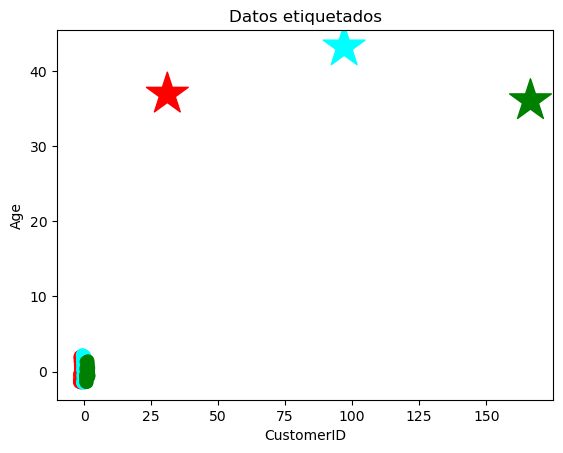

In [105]:
f1 = x['CustomerID'].values
f2 = x['Age'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

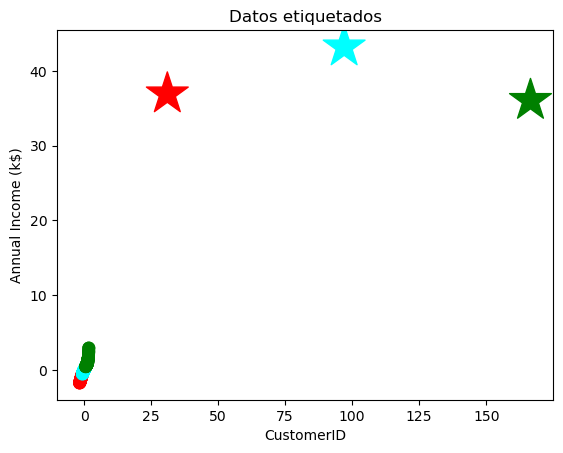

In [106]:
f1 = x['CustomerID'].values
f2 = x['Annual Income (k$)'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.show()

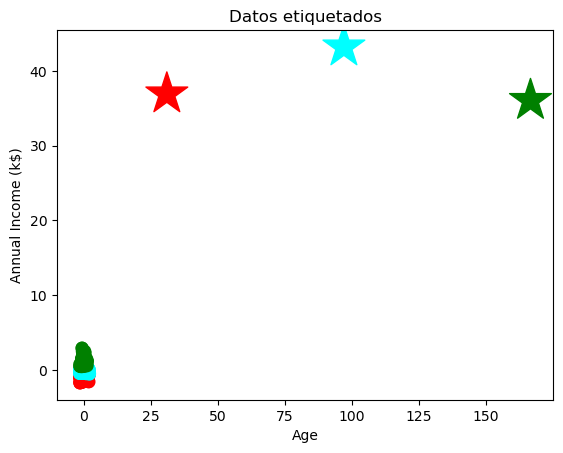

In [107]:
f1 = x['Age'].values
f2 = x['Annual Income (k$)'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [115]:
X_new = scaler.fit_transform(np.array([[10,5.4,3.3,1.2,0.25]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[0]
['red']


In [116]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.49379831271726604
Índice de Calinski-Harabasz: 499.7856232497221
Inertia (suma de cuadrados dentro de los clusters): 138765.57410664565
Davies-Bouldin Index: 0.6609629178052064


# hierarchical clustering

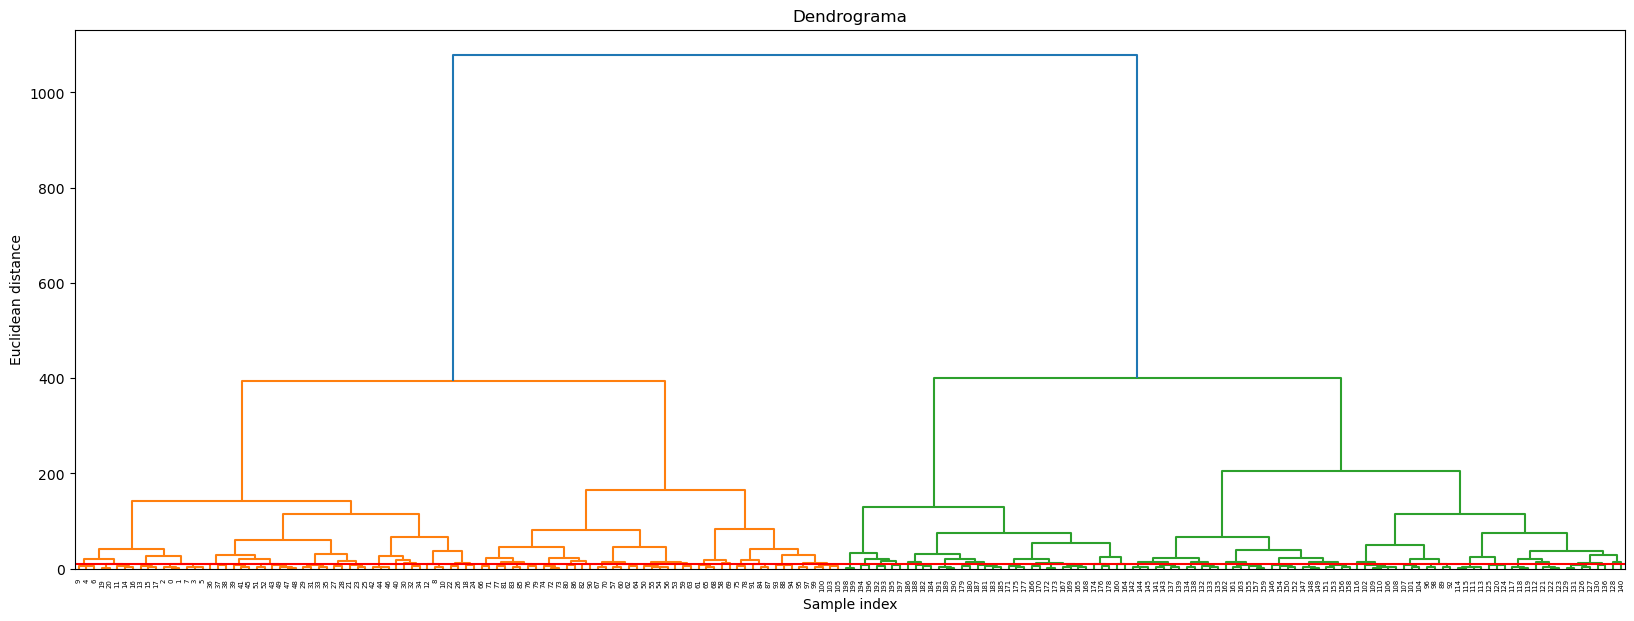

In [117]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [120]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [121]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

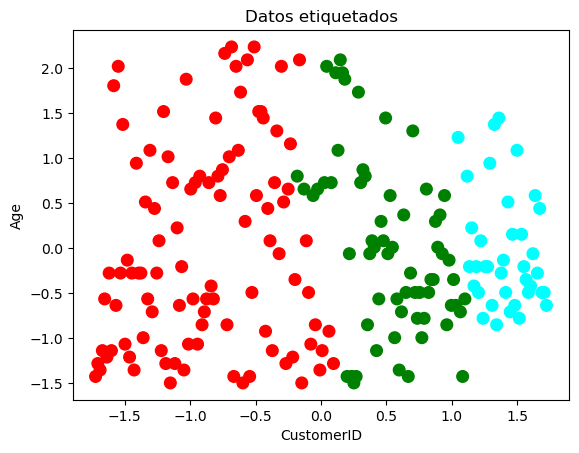

In [123]:
f1 = x['CustomerID'].values
f2 = x['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()


In [124]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

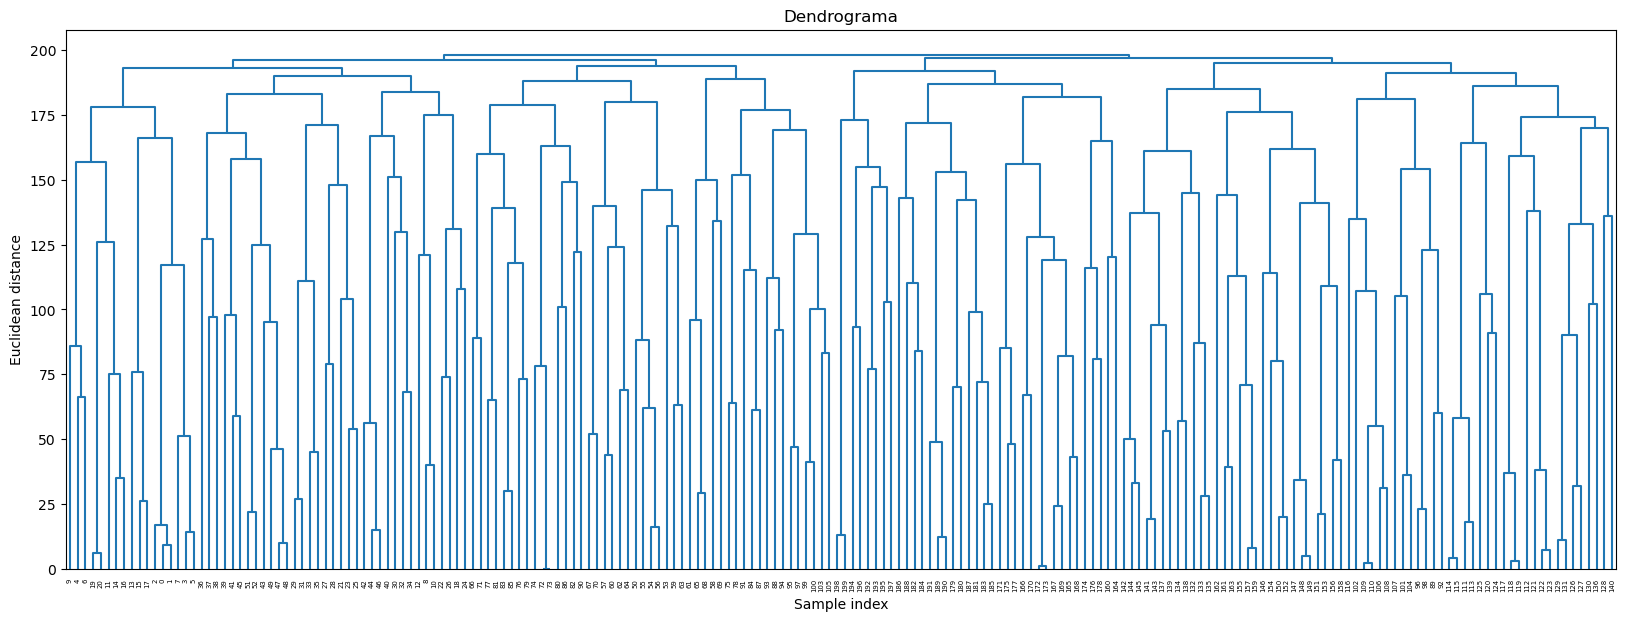

In [125]:
plot_dendrogram(hier_clustering, color_threshold=0)

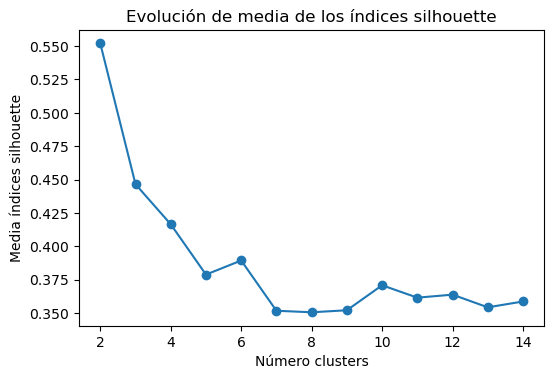

In [126]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [127]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.4464666445351129
Índice de Calinski-Harabasz: 357.65158057754365
Davies-Bouldin Index: 0.6708659320516502


In [130]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
x_dist = pdist(x)
# Compute the linkage matrix
Z = linkage(x, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, x_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.7536751902403347, array([ 0.14457468, 28.35617507, 28.35617507, ...,  0.49276231,
        0.49276231,  0.14457468]))
